Predspracovanie údajov pre strojové učenie

    2.1 Realizácia predspracovania dát

        (A-1b) Oddelenie testovacich a trénovacich údajov 

In [375]:
import pandas as pd
from sklearn.model_selection import train_test_split
seed = 1

df_connections = pd.read_csv('../024/connections.csv', sep='\t')
df_conn_train, df_conn_test = train_test_split(df_connections,test_size=0.2,random_state=seed)


In [376]:
df_conn_train.columns = df_conn_train.columns.str.strip()
df_conn_train.describe()

,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.updateassist,c.raider,c.android.vending,c.UCMobile.x86,c.UCMobile.intl
count,1.204800e+04,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000
mean,3.874297e+18,0.623755,13.857034,11.459608,12.709338,12.724821,11.458469,51.188293,0.288936,53.046279,50.206914,49.633380
std,3.329365e+18,0.484463,1.981728,2.375027,2.772561,2.414796,2.720620,13.229592,1.854040,13.228002,28.841577,28.848133
min,3.590434e+17,0.000000,5.529240,3.110140,2.866340,3.340770,1.782970,2.523260,0.000000,0.000000,0.023610,0.004030
25%,8.630331e+17,0.000000,12.529988,9.666643,10.861035,11.250798,9.562890,42.335385,0.001960,43.965960,25.168135,24.451700
50%,3.590434e+18,1.000000,13.844695,11.475050,12.894840,13.080700,11.224025,51.249325,0.014610,53.108745,50.006300,49.343940
75%,8.630331e+18,1.000000,15.198493,13.416005,14.664917,14.430600,13.254015,60.025915,0.097177,62.243650,75.156483,74.676090
max,8.630331e+18,1.000000,22.627600,18.692120,22.497680,19.779280,22.010660,100.000000,100.000000,100.000000,100.000000,99.998080


In [377]:
df_conn_test.columns = df_conn_test.columns.str.strip()
df_conn_test.describe()

,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.updateassist,c.raider,c.android.vending,c.UCMobile.x86,c.UCMobile.intl
count,3.013000e+03,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,4.015125e+18,0.633588,13.849478,11.472812,12.677949,12.746519,11.414218,51.918078,0.261524,52.599544,50.113787,50.449837
std,3.346096e+18,0.481904,2.008738,2.395518,2.797705,2.396194,2.720477,13.423413,1.281103,13.528445,28.789299,28.940542
min,3.590434e+17,0.000000,6.990570,3.541460,2.968550,3.967040,3.724800,0.000000,0.000050,10.604020,0.000000,0.000000
25%,8.630331e+17,0.000000,12.437940,9.647480,10.782530,11.245400,9.484660,42.795020,0.001840,43.162890,25.162950,25.592870
50%,3.590434e+18,1.000000,13.851280,11.571820,12.827380,13.146450,11.248370,51.964140,0.015650,52.813800,49.786660,50.575220
75%,8.630331e+18,1.000000,15.212910,13.431860,14.643940,14.483010,13.197250,60.801940,0.100500,61.972600,75.123020,75.620510
max,8.630331e+18,1.000000,20.753480,17.128590,23.698900,19.852750,20.278220,95.977850,37.268070,94.116660,99.996260,100.000000


Pomocou knižnice sklearn.model_selection prostredníctvom metódy train_test_split sme rozdelili údaje z našich dvoch datasetov na testovacie a trénovaciu množini s rozdelením 20/80

        (B-1b) Transformacia dát na vhodný formát pre ML

In [378]:
import numpy as np
df_conn = pd.read_csv('../024/connections.csv', sep='\t')


def save_df(df, output_file):
    df.to_csv(output_file, sep='\t', index=False)


def clean_data_Nan(df, method):
    if method == 1:
        cleaned_df = df.dropna()
        print(f"Vymazané NaN: {len(df) - len(cleaned_df)}")
    elif method == 2:
        for column in df.columns:
            if df[column].isnull().any():
                 if pd.api.types.is_numeric_dtype(df[column]):
                        replacement_value = df[column].mean()
                        df[column] = df[column].fillna(replacement_value)
                        print(f"Hodnota v '{column}' nahradená: {replacement_value}")
                 else:
                        print(f"Stĺpec '{column}' nie je číselný a nebude vyplnený priemernou hodnotou.")
        cleaned_df = df
    else:
        print("Chyba: Neznáma metóda")
        return None
    
    return cleaned_df


def remove_outliers_zscore(df, threshold=3):
    df_cleaned = df.copy()
    
    for column in df_cleaned.select_dtypes(include=[np.number]).columns:
        z_scores = (df_cleaned[column] - df_cleaned[column].mean()) / df_cleaned[column].std()
        df_cleaned = df_cleaned[(np.abs(z_scores) < threshold)]
    
    return df_cleaned


def remove_outliers_iqr(df):
    df_cleaned = df.copy()
    
    for column in df_cleaned.select_dtypes(include=[np.number]).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Výpočet 5% a 95% hraníc
        lower_limit = df_cleaned[column].quantile(0.05)
        upper_limit = df_cleaned[column].quantile(0.95)
        
        # Nahradenie odľahlých hodnôt hranicami rozdelenia
        df_cleaned[column] = np.where(df_cleaned[column] < lower_bound, lower_limit, df_cleaned[column])
        df_cleaned[column] = np.where(df_cleaned[column] > upper_bound, upper_limit, df_cleaned[column])
    
    return df_cleaned


def A2b(df):
    df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    df['ts'] = (df['ts'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    
    return df

In [379]:
def cleaner (df):
    processed_df = A2b(df)

    # Clean all NaN values
    clean_data = clean_data_Nan(processed_df, 1)
    
    # Drop duplicates
    clean_data = clean_data.drop_duplicates()
    
    # Drop outliers
    clean_data = remove_outliers_zscore(clean_data)
    
    return clean_data

In [380]:
clean_data_train = cleaner(df_conn_train)

# Save cleaned data
save_df(clean_data_train, '../datasets/024-ver1/connections.csv')
df_conn_train_prepared = clean_data_train

Vymazané NaN: 0


In [381]:
df_conn_train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11650 entries, 10125 to 13349
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 11650 non-null  int64  
 1   imei               11650 non-null  int64  
 2   mwra               11650 non-null  float64
 3   c.android.youtube  11650 non-null  float64
 4   c.dogalize         11650 non-null  float64
 5   c.android.gm       11650 non-null  float64
 6   c.katana           11650 non-null  float64
 7   c.android.chrome   11650 non-null  float64
 8   c.updateassist     11650 non-null  float64
 9   c.raider           11650 non-null  float64
 10  c.android.vending  11650 non-null  float64
 11  c.UCMobile.x86     11650 non-null  float64
 12  c.UCMobile.intl    11650 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 1.2 MB


In [382]:
df_conn_train_prepared.describe()

,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.updateassist,c.raider,c.android.vending,c.UCMobile.x86,c.UCMobile.intl
count,1.165000e+04,1.165000e+04,11650.000000,11650.000000,11650.000000,11650.000000,11650.000000,11650.000000,11650.000000,11650.000000,11650.000000,11650.000000,11650.000000
mean,1.525960e+09,3.867150e+18,0.625579,13.845608,11.480275,12.690080,12.725903,11.456011,51.183711,0.170750,53.047795,50.216500,49.623120
std,2.569504e+05,3.331052e+18,0.483994,1.938354,2.364017,2.745941,2.383006,2.687142,13.029640,0.517076,13.096375,28.831258,28.871116
min,1.525514e+09,3.590434e+17,0.000000,7.917070,4.457660,4.413550,5.488670,3.342910,11.670030,0.000020,13.584020,0.023610,0.004030
25%,1.525738e+09,8.630331e+17,0.000000,12.526855,9.683953,10.840343,11.250092,9.572653,42.387077,0.001960,43.976847,25.189980,24.416992
50%,1.525960e+09,3.590434e+18,1.000000,13.835950,11.500020,12.875860,13.071440,11.227660,51.245200,0.014280,53.096815,49.929690,49.238285
75%,1.526182e+09,8.630331e+18,1.000000,15.182255,13.435153,14.637385,14.422017,13.240355,59.987570,0.093332,62.237675,75.241275,74.662737
max,1.526407e+09,8.630331e+18,1.000000,19.792880,17.910980,20.851680,19.779280,19.619420,90.661820,5.576130,92.714250,100.000000,99.998080


        (C-2b) Transformacia atribútov dát pre strojové učenie

In [383]:
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import warnings

def scale_features(df):
    df_scaled = df.copy()
    standard_scaler = MinMaxScaler()
    robust_scaler = RobustScaler()
    
    for column in df.select_dtypes(include=[np.number]).columns:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=UserWarning)
                
                shapiro_stat, p_value = shapiro(df[column])
            
            if p_value > 0.05:
                df_scaled[column] = standard_scaler.fit_transform(df[[column]])
                print(f"{column}:Data Scaling [Normalization] (p-value={p_value:.5f})")
            else:
                df_scaled[column] = robust_scaler.fit_transform(df[[column]])
                print(f"{column}:Robust Scaling (p-value={p_value:.5f})")
        
    return df_scaled

In [384]:
df_conn_train_scaled = scale_features(df_conn_train_prepared)
df_conn_train_scaled.head()

ts:Robust Scaling (p-value=0.00000)
imei:Robust Scaling (p-value=0.00000)
mwra:Robust Scaling (p-value=0.00000)
c.android.youtube:Robust Scaling (p-value=0.00025)
c.dogalize:Robust Scaling (p-value=0.00000)
c.android.gm:Robust Scaling (p-value=0.00000)
c.katana:Robust Scaling (p-value=0.00000)
c.android.chrome:Robust Scaling (p-value=0.00000)
c.updateassist:Robust Scaling (p-value=0.00075)
c.raider:Robust Scaling (p-value=0.00000)
c.android.vending:Robust Scaling (p-value=0.00000)
c.UCMobile.x86:Robust Scaling (p-value=0.00000)
c.UCMobile.intl:Robust Scaling (p-value=0.00000)


,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.updateassist,c.raider,c.android.vending,c.UCMobile.x86,c.UCMobile.intl
10125,0.364054,-0.416025,-1.0,0.439922,-0.774848,0.287835,0.464459,-0.784963,0.628191,-0.144245,0.019994,-0.861594,-0.231708
7466,0.004463,0.000000,0.0,0.656342,-0.095812,-0.176034,-0.268266,0.582836,0.898729,2.982517,-0.214677,0.118457,0.773000
7007,-0.057610,-0.416025,-1.0,-0.337290,0.269186,0.605403,0.633710,-0.870460,-0.040470,-0.140414,-0.572975,-0.403438,0.966157
7364,-0.009331,0.000000,0.0,0.486526,0.892976,-0.771032,-0.098867,0.347553,-0.480950,2.957235,-0.111047,-0.137672,-0.273171
10697,0.441409,0.000000,0.0,0.605257,0.891824,-1.645794,-0.526396,0.643984,-0.513292,-0.027579,-0.635394,-0.754674,-0.354207


Všetky uvedené parametre nie majú normálne rozdelenie, čo potvrdzuje, že Robust Scaling správna voľba na ich normalizáciu. 

Táto metóda je odolnejšia voči odľahlým hodnotám a umožňuje efektívne spracovanie údajov s asymetrickým rozdelením, čo ju v tomto kontexte robí vhodnejšou

In [385]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

def apply_scaling(df):
    transformed_columns = {}
    
    for column in df.columns:
        skewness = df[column].skew()
        kurtosis = df[column].kurt()
        
        if skewness > 1 or kurtosis > 3:
            transformer = QuantileTransformer(output_distribution='normal', random_state=0)
            print(f"{column}:Use Quantile Transformer (skewness: {skewness:.2f},kurtosis: {kurtosis:.2f})")
        else:
            transformer = PowerTransformer(method='yeo-johnson')
            print(f"{column}:Use Power Transformer (skewness: {skewness:.2f},kurtosis: {kurtosis:.2f})")
        
        transformed_columns[column] = transformer.fit_transform(df[[column]]).flatten()

    df_scaled = pd.DataFrame(transformed_columns)
    return df_scaled

In [386]:
df_conn_train_scaled_transformed = apply_scaling(df_conn_train_scaled)
df_conn_train_scaled_transformed.describe()

ts:Use Power Transformer (skewness: 0.01,kurtosis: -1.19)
imei:Use Power Transformer (skewness: 0.48,kurtosis: -1.37)
mwra:Use Power Transformer (skewness: -0.52,kurtosis: -1.73)
c.android.youtube:Use Power Transformer (skewness: -0.00,kurtosis: -0.16)
c.dogalize:Use Power Transformer (skewness: -0.15,kurtosis: -0.72)
c.android.gm:Use Power Transformer (skewness: -0.23,kurtosis: -0.27)
c.katana:Use Power Transformer (skewness: -0.51,kurtosis: -0.09)
c.android.chrome:Use Power Transformer (skewness: 0.27,kurtosis: -0.21)
c.updateassist:Use Power Transformer (skewness: 0.01,kurtosis: -0.11)
c.raider:Use Quantile Transformer (skewness: 5.73,kurtosis: 39.25)
c.android.vending:Use Power Transformer (skewness: -0.04,kurtosis: -0.26)
c.UCMobile.x86:Use Power Transformer (skewness: -0.01,kurtosis: -1.20)
c.UCMobile.intl:Use Power Transformer (skewness: 0.01,kurtosis: -1.21)


,ts,imei,mwra,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.android.chrome,c.updateassist,c.raider,c.android.vending,c.UCMobile.x86,c.UCMobile.intl
count,1.165000e+04,1.165000e+04,1.165000e+04,1.165000e+04,1.165000e+04,1.165000e+04,1.165000e+04,1.165000e+04,1.165000e+04,11650.000000,1.165000e+04,1.165000e+04,1.165000e+04
mean,-2.805576e-17,-2.195669e-17,7.501868e-17,-2.012696e-17,-1.524770e-17,5.184217e-18,1.646751e-17,-1.219816e-18,1.097834e-17,-0.001820,-1.768733e-17,-2.226164e-17,2.622604e-17
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,0.996601,1.000043e+00,1.000043e+00,1.000043e+00
min,-1.739041e+00,-1.189397e+00,-1.292592e+00,-3.056793e+00,-2.759068e+00,-2.724453e+00,-2.475986e+00,-3.481830e+00,-3.043555e+00,-5.199338,-2.964277e+00,-1.737802e+00,-1.727310e+00
25%,-8.652174e-01,-9.439613e-01,-1.292592e+00,-6.805084e-01,-7.752752e-01,-7.010348e-01,-6.943364e-01,-6.787559e-01,-6.743798e-01,-0.673702,-6.962505e-01,-8.684297e-01,-8.721923e-01
50%,1.797714e-03,1.413756e-01,7.736395e-01,-5.262743e-03,-2.825218e-02,1.704307e-02,3.541395e-02,-2.623405e-02,6.352301e-03,-0.002979,-3.956160e-03,-1.167183e-02,-8.602183e-03
75%,8.615551e-01,1.328816e+00,7.736395e-01,6.894801e-01,8.197072e-01,6.903188e-01,6.802863e-01,6.970783e-01,6.764936e-01,0.673244,6.984171e-01,8.676698e-01,8.683093e-01
max,1.735955e+00,1.328816e+00,7.736395e-01,3.070230e+00,2.933558e+00,3.346621e+00,3.967856e+00,2.702795e+00,3.019270e+00,5.199338,3.080683e+00,1.729943e+00,1.736155e+00


Analýza jednotlivých atribútov v tomto súbore údajov ukázala, že transformátor výkonu bol vhodný pre väčšinu premenných, pretože hodnoty šikmosti a kurtózy boli v prijateľných medziach. Atribút c.raider s vysokým stupňom šikmosti a kurtózy si však vyžadoval použitie kvantilovej transformácie, pretože jeho rozdelenie sa výrazne líšilo od normálneho a obsahovalo extrémne odľahlé hodnoty.

Atribúty so zanedbateľnou skewness a zápornou kurtosis:
Príklady: ts, imei, mwra, c.android.youtube, c.dogalize, c. android .gm, c.katana, c. android .chrome, c.updateassist, c.android.vending, c.UCMobile.x86, c.UCMobile.intl.
Tieto premenné vykazovali nízku šikmosť (skewness od -0,5 do 0,5) a zápornú kartózu (kurtosis od -1,72 do -0,13), čo naznačuje slabo sklonené rozdelenia s mierne negatívnymi chvostmi.
Power Transformer úspešne normalizoval údaje, čím minimalizoval šikmosť a kartózu. Údaje nadobudli hladší vzhľad, pričom sa zachovali pôvodné štruktúry a vzťahy.

Atribút s extrémnou asymetriou a vysokou kurtosis:
Atribút c.raider má skewness = 5,78 a kurtosis = 39,86, čo naznačuje extrémne skreslené rozdelenie s dlhými chvostmi a početnými odľahlými hodnotami.
Na tento atribút bol použitý kvantilový transformátor a transformoval ho na normálne rozdelenie. Táto transformácia bola potrebná na účinné vyrovnanie údajov a odstránenie silných odľahlých hodnôt, inak by mohli nastať problémy pri modelovaní a analýze údajov.

Transformátor výkonu bol vhodnou voľbou pre väčšinu atribútov v súbore údajov, keďže ich rozdelenia mali miernu šikmosť a mapovanie blízke normálnemu rozdeleniu.
Kvantilová transformácia sa ukázala ako nevyhnutná pre c.raider kvôli extrémnym hodnotám šikmosti a kartózy, čo umožnilo rozdelenia značne sploštiť.

        (D-1b) Všeobecné závery

Súbor údajov bol spracovaný pomocou kombinácie metód škálovania a transformácie s cieľom optimalizovať jeho rozloženie, zlepšiť dostupnosť modelu a zmierniť vplyv odľahlých hodnôt.
Výber metódy pre každý prvok bol založený na štatistických testoch a charakteristikách rozdelenia, pričom sa zabezpečilo, aby transformácie zodpovedali hlavným vlastnostiam údajov
1. Prístup založený na škálovaní
Shapiro-Wilkov test normality: Pre každý číselný stĺpec sa normálnosť rozdelenia posudzovala pomocou Shapiro-Wilkovho testu
MinMax škálovanie: Použilo sa na prvky s p-hodnotami > 0,05, ktoré naznačujú normálne rozdelené údaje. MinMax škálovanie normalizovalo hodnoty v rozsahu [0, 1], čím sa zvýšila konzistencia bez zmeny tvaru rozdelenia
Robustné škálovanie : Robustné škálovanie sa použilo pre znaky s p-hodnotami ≤ 0,05, ktoré naznačujú nenormálne rozdelenie. Toto škálovanie je odolné voči odľahlým hodnotám, pretože používa medián a medzikvartilový rozsah, čím účinne normalizuje údaje s výraznými odľahlými hodnotami alebo odľahlými hodnotami
2. Pokročilé transformačné techniky
Kvantilová transformácia: Používa sa na atribúty so šikmosťou > 1 alebo kurtózou > 3, čo naznačuje vysokú šikmosť alebo vrcholovosť. Táto metóda koriguje rozdelenia tak, aby boli rovnomernejšie alebo normálne, čím sa redukujú extrémne odľahlé hodnoty a údaje sú vhodné pre modely citlivé na normalitu
Transformátor výkonu (Yeo-Johnson) : Používa sa pre stĺpce s nízkymi hodnotami šikmosti a kurtózy. Transformátor sily znižuje menšie šikmosti a rovnomernejšie rozdeľuje údaje, čím zvyšuje stabilitu znakov blízkych normálnemu rozdeleniu

Kľúčové výsledky:
Zlepšená rovnomernosť rozdelenia: Kvantilová metóda aj Power Transformer normalizovali veľmi skreslené údaje, čo umožnilo, aby znaky lepšie zodpovedali predpokladom normality modelu.
Zlepšená kompatibilita modelov: Vhodným škálovaním a transformáciou sa súbor údajov stal homogénnejším, čím sa minimalizovali odľahlé hodnoty a zlepšila sa kompatibilita s rôznymi modelmi strojového učenia.
Zachovanie integrity údajov: Každá metóda transformácie bola použitá selektívne na základe štatistických charakteristík, čím sa zachovala štruktúra údajov a dosiahla normalizácia údajov.

    2.2 Výber atribútov pre strojové učenie

        (A-3b) Výpočet informatívnych atribútov pre výpočetanie premennej

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
import warnings

fit_transformer = None

# Variance Threshold
def variance_threshold(df, start=0.0, stop=0.55, step=0.05, data_type='train'):
    global fit_transformer
    
    X = df.select_dtypes(include=[np.number]).values
    thresholds = np.arange(start, stop, step)
    results = list()
    
    for t in thresholds:
        transform = VarianceThreshold(threshold=t)
        if data_type == 'train':
            X_sel = transform.fit_transform(X)
            fit_transformer = transform 
        else:
            X_sel = fit_transformer.transform(X)
            
        n_features = X_sel.shape[1]
        print('>Threshold=%.2f, Features=%d' % (t, n_features)) 
        results.append(n_features)
    
    plt.plot(thresholds, results)
    plt.title('Variance Threshold Feature Selection')
    plt.xlabel('Threshold')
    plt.ylabel('Number of Features')
    plt.grid()
    plt.show()
    
    return fit_transformer

# ANOVA F-value
def select_features_anova(X, y, k=2, data_type='train', fit_selector=None):
    if data_type == 'train':
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X, y)
    else:
        X_selected = fit_selector.transform(X)
        selector = fit_selector
    selected_features = X.columns[selector.get_support()]
    print(f"Features: {selected_features.tolist()}")

    X_selected = pd.DataFrame(X_selected, columns=selected_features)
    return X_selected, selector

# Random Forest
def random_forest_with_feature_selection(X, y, n_estimators=100, max_depth=None, random_state=42, test_size=0.2, threshold='mean', data_type='train'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    if data_type == 'train':
        model.fit(X_train, y_train)
    else:
        model.fit(X_test, y_test)
  
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)

        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)
    
    model_selected = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    model_selected.fit(X_train_selected, y_train)
    
    y_pred = model_selected.predict(X_test_selected)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print()
    print("Features:", X.columns[selector.get_support()].tolist())
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

# Mutual Information
def mic(X, y, k=4, data_type='train', mic_selector=None):    
    if data_type == 'train':
        selector = SelectKBest(score_func=mutual_info_regression, k=k)
        X_selected = selector.fit_transform(X, y)
    else:
        X_selected = mic_selector.transform(X)
        selector = mic_selector

    scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    scores.plot(kind='barh')
    plt.xlabel("Score")
    plt.ylabel("Features")
    plt.title("Feature Importance by Mutual Information")
    plt.show()
    
    print("Top Features:")
    print(scores.head(k))

    return selector



>Threshold=0.00, Features=13
>Threshold=0.05, Features=13
>Threshold=0.10, Features=13
>Threshold=0.15, Features=13
>Threshold=0.20, Features=13
>Threshold=0.25, Features=13
>Threshold=0.30, Features=13
>Threshold=0.35, Features=13
>Threshold=0.40, Features=13
>Threshold=0.45, Features=13
>Threshold=0.50, Features=13


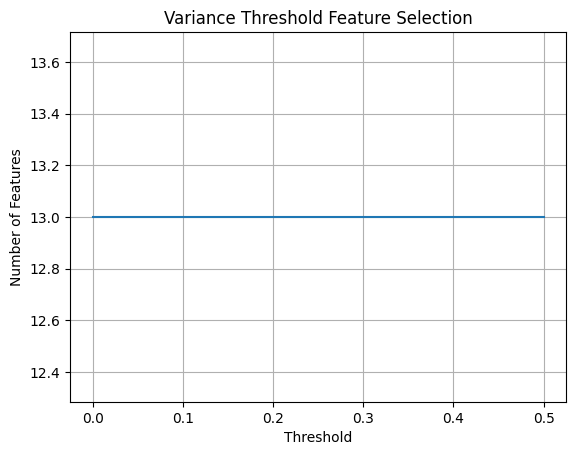


Features: ['c.dogalize', 'c.katana']

Features: ['c.dogalize', 'c.katana', 'c.android.chrome', 'c.raider']
Mean Squared Error: 0.5987934510499068
R-squared: 0.3997009794066796


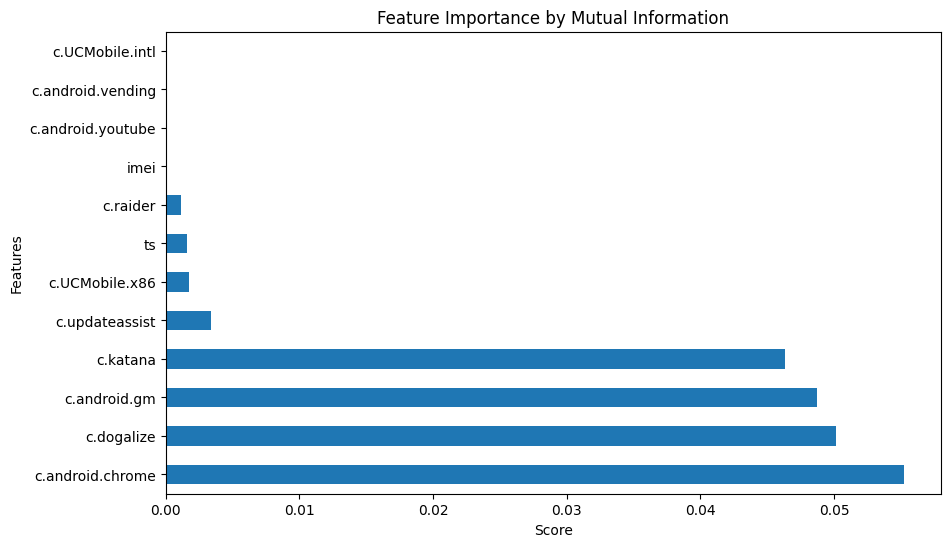

Top Features:
c.android.chrome    0.055226
c.dogalize          0.050139
c.android.gm        0.048724
c.katana            0.046335
dtype: float64


In [388]:
fit_transformer = variance_threshold(df_conn_train_scaled_transformed,data_type='train')
print()

df_conn_temp = df_conn_train_scaled_transformed.drop(columns=['mwra'])
df_conn_features, fitted_selector = select_features_anova(df_conn_temp, df_conn_train_scaled_transformed['mwra'], k=2, data_type='train')

random_forest_with_feature_selection(df_conn_temp, df_conn_train_scaled_transformed['mwra'], n_estimators=100, max_depth=None, random_state=42, test_size=0.2, threshold='mean',data_type='train')


selector = mic(df_conn_temp, df_conn_train_scaled_transformed['mwra'], k=4,data_type='train')

Variance Threshold

Počet prvkov zostáva rovnaký (13) pre akúkoľvek prahovú hodnotu odchýlky medzi 0,0 a 0,5
To znamená, že všetky prvky v dátovom rámci df_proc_train_scaled_transformed majú rozptyl vyšší ako 0,5, a preto pri zmene prahovej hodnoty nebol odstránený žiadny prvok


ANOVA F-value

Po použití metódy ANOVA s hodnotou F na výber príznakov sme vybrali dva najvýznamnejšie príznaky: c.dogalize, c.katana
Tieto vlastnosti vykazovali podľa výsledkov F-testu najvyššiu asociáciu s cieľovou premennou mvra, a preto sú najdôležitejšie na vysvetlenie variability cieľovej premennej

Random Forest
Boli vybrané tieto príznaky: c.dogalize, c.android.gm, c.katana, c.android.chrome a c.raider. 
MSE bola 0,4984, čo je o niečo vyššia hodnota ako v prvom teste, čo naznačuje o niečo väčšiu chybu modelu.


Mutual Information
Top 3 z hľadiska významnosti pre data connections:
c.katana (0,0544) - c.katana bola najvýznamnejším znakom v tomto súbore údajov, hoci jej hodnota vzájomnej informácie je oveľa nižšia ako u vedúcich znakov v prvom grafe.
c.android.chrome (0,0532) - má významnosť blízku c.katana, čo naznačuje jeho dôležitosť pre predpovede cieľovej premennej.
c.dogalise (0,0525) - tiež vykazuje významnosť podobnú predchádzajúcim znakom.

        (B-1b) Zoradenie atribútov podľa dôležitosti

# Top Features

## Pre Connections:
1. **c.katana** (Mutual Information: 0.0544)
2. **c.android.chrome** (Mutual Information: 0.0532)
3. **c.dogalize** (Mutual Information: 0.0525)
4. **c.android.gm** (Mutual Information: 0.0463)
5. **c.raider** (Mutual Information)
6. **c.UCMobile.intl** (Mutual Information)
7. **c.UCMobile.x86** (Mutual Information)
8. **c.updateassist** (Mutual Information)
9. **c.android.vending** (Mutual Information)
10. **c.android.youtube** (Mutual Information)
11. **ts** (Mutual Information)
12. **imei** (Mutual Information)
13. **c.notifier** (Mutual Information)


        (C-1b) Zdôvodnenie rozhodnuti pre realizáciu 

V rámci analýzy rôznych techník výberu príznakov boli pre oba dátové rámce identifikované kľúčové príznaky s vysokou významnosťou

Tieto príznaky poskytujú základ pre ďalšie modelovanie a môžu výrazne prispieť k presnosti predpovedí

    2.3  Replikovateľnosť predspracovania

(A-3b) Upraveny kód realizujúci predspracovanie trénovacej množiny tak, aby ho bolo možné bez ďalších úprav znovu použiť na predspracovanie testovacej množiny v kontexte strojového učenia


Vymazané NaN: 0
ts:Robust Scaling (p-value=0.00000)
imei:Robust Scaling (p-value=0.00000)
mwra:Robust Scaling (p-value=0.00000)
c.android.youtube:Robust Scaling (p-value=0.02885)
c.dogalize:Robust Scaling (p-value=0.00000)
c.android.gm:Robust Scaling (p-value=0.00002)
c.katana:Robust Scaling (p-value=0.00000)
c.android.chrome:Robust Scaling (p-value=0.00000)
c.updateassist:Data Scaling [Normalization] (p-value=0.05569)
c.raider:Robust Scaling (p-value=0.00000)
c.android.vending:Robust Scaling (p-value=0.02592)
c.UCMobile.x86:Robust Scaling (p-value=0.00000)
c.UCMobile.intl:Robust Scaling (p-value=0.00000)
ts:Use Power Transformer (skewness: -0.02,kurtosis: -1.24)
imei:Use Power Transformer (skewness: 0.41,kurtosis: -1.44)
mwra:Use Power Transformer (skewness: -0.57,kurtosis: -1.67)
c.android.youtube:Use Power Transformer (skewness: 0.01,kurtosis: -0.25)
c.dogalize:Use Power Transformer (skewness: -0.16,kurtosis: -0.72)
c.android.gm:Use Power Transformer (skewness: -0.14,kurtosis: -0.27

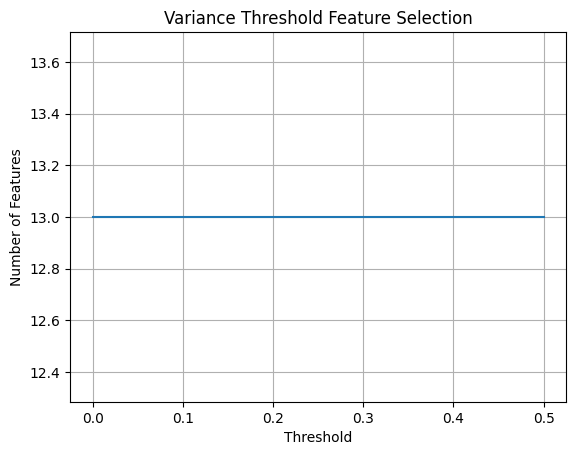


Features: ['c.dogalize', 'c.katana']


/Users/faustyn/Developer/STU_2324/IAU/IAU_Project/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but VarianceThreshold was fitted without feature names
  warnings.warn(



Features: ['c.dogalize', 'c.android.gm', 'c.katana', 'c.android.chrome']
Mean Squared Error: 0.5684902261734514
R-squared: 0.4121146449317076


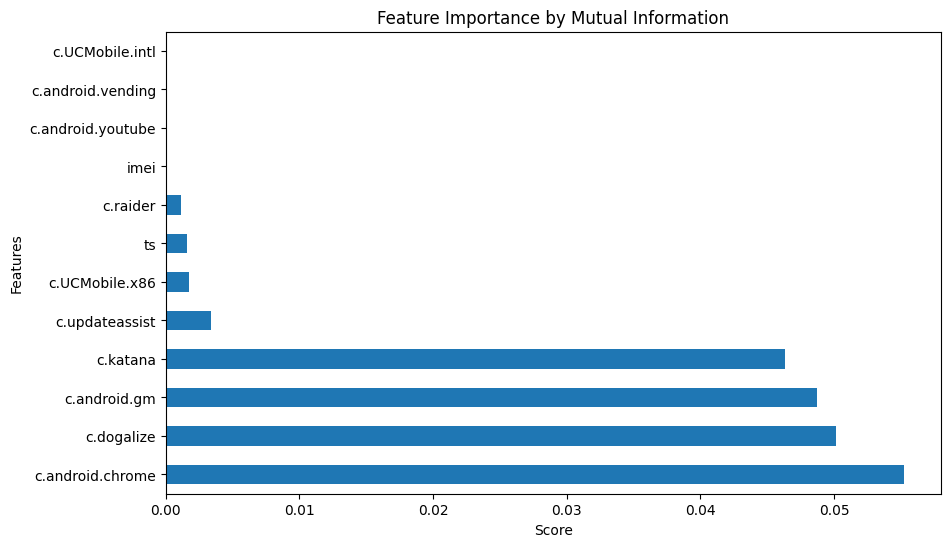

Top Features:
c.android.chrome    0.055226
c.dogalize          0.050139
c.android.gm        0.048724
c.katana            0.046335
dtype: float64


SelectKBest(k=4, score_func=<function mutual_info_regression at 0x1188f0d60>)

In [389]:
clean_data_test = cleaner(df_conn_test)
df_conn_test_prepared = clean_data_test



df_conn_test_scaled = scale_features(df_conn_test_prepared)
df_conn_test_scaled_transformed = apply_scaling(df_conn_test_scaled)


fit_transformer = variance_threshold(df_conn_test_scaled_transformed, data_type='train')
X_transformed = fit_transformer.transform(df_conn_test_scaled_transformed) 
print()

columns_selected = df_conn_test_scaled.columns[fit_transformer.get_support()] 
df_conn_test_transformed = pd.DataFrame(X_transformed, columns=columns_selected)

if 'mwra' in df_conn_test_scaled_transformed.columns:
    df_conn_temp = df_conn_test_transformed.drop(columns=['mwra'])
else:
    df_conn_temp = df_conn_test_transformed

if 'mwra' in df_conn_test_scaled_transformed.columns:
    df_conn_features, _ = select_features_anova(df_conn_temp, df_conn_test_scaled_transformed['mwra'], k=2, data_type='test', fit_selector=fitted_selector)


random_forest_with_feature_selection(df_conn_temp, df_conn_test_scaled_transformed['mwra'], n_estimators=100, max_depth=None, random_state=42, test_size=0.2, threshold='mean',data_type='test')

mic(df_conn_temp, df_conn_test_scaled_transformed['mwra'], k=4,data_type='test',mic_selector = selector)


Pri opätovnom volaní našich metód s použitím tréningovej časti našich súborov údajov sme nedostali chybu a dosiahli sme akceptovateľný výsledok a samoyrejme použivali sme .fit len pre trenovanie jedinečne

(B-2b) Využitee možnosti sklearn.pipeline

In [390]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, StandardScaler


def cleaner(df):
    # Apply A2b transformation
    processed_df = A2b(df)
    
    # Clean NaN values
    clean_data = clean_data_Nan(processed_df, 1)

    # Drop duplicates
    clean_data = clean_data.drop_duplicates()

    # Drop outliers
    clean_data = remove_outliers_zscore(clean_data)

    return clean_data
    
cleaner_transformer = FunctionTransformer(cleaner)

#pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier(random_state=seed))
])


df_connections = pd.read_csv('../024/connections.csv', sep='\t')
df_connections_cleaned = cleaner(df_connections)
df_conn_train, df_conn_test = train_test_split(df_connections_cleaned, test_size=0.2, random_state=seed)

X_conn_train = df_conn_train.drop(columns=['mwra'])
y_conn_train = df_conn_train['mwra']

X_conn_test = df_conn_test.drop(columns=['mwra'])
y_conn_test = df_conn_test['mwra']

pipeline.fit(X_conn_train, y_conn_train)

conn_accuracy = pipeline.score(X_conn_test, y_conn_test)
print("Connections Dataset Accuracy:", conn_accuracy)


Vymazané NaN: 0
Connections Dataset Accuracy: 0.8448038540949759


Zhrnutie výsledkov

Presnosť súboru údajov o Connections: Model dosiahol presnosť 84,48 % v súbore údajov o spojeniach. To naznačuje, že model si pri predpovedaní cieľovej premennej v tomto súbore údajov vedie dobre a s pomerne vysokou úrovňou presnosti.

Presnosť súboru údajov o Processes: V súbore údajov o procesoch dosiahol model ešte lepšie výsledky, keď dosiahol presnosť 89,55 %. To naznačuje, že model je pri predpovedaní cieľovej premennej v tomto súbore údajov ešte účinnejší, čo môže byť spôsobené povahou prvkov alebo kvalitou údajov.

**Percentuálny podiel práce členov dvojice v tiejto prace bol 50/50 %**